# ELE 435/535 Computational HW3: Solution

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# from google.colab import files
# uploaded = files.upload()

%matplotlib inline

Saving housing.data to housing (3).data


##  Least Squares and Ridge Regression

### (1) Housing Dataset:

\We will be working with a dataset that records house prices in the suburbs of Boston. The data contains 14 columns, the first 13 columns correspond to various housing features, such as "CRIM" (crime rate per capita), "RM" (average number of rooms), "TAX" (tax rate), etc. A more comprehensive description can be found at https://www.kaggle.com/c/boston-housing. The last column corresponds to the median value of owner-occupied homes in $1000's. 

**1-a) Load the housing dataset**    
Form a matrix X with each column a feature, and a vector y of target values.

In [153]:
housing_data = np.loadtxt('housing.data')
X = np.matrix(housing_data[:,0:13])
y = np.matrix(housing_data[:,13]).T

**1-b) Examine the data**    
* Print the dimensions of X and the dimensions of y.
* Determine and print the number of features and the number of sample points.
* Compute and print the sample mean of the house features
* Compute and print the mean target value (mean house price).

In [154]:
# Your Code

# prints dimensions of X and y
print("X-dim = " + str(X.shape))
print("y-dim = " + str(y.shape))

# number of features is # of column vectors
# number of samples is # of row vectors
num_features = X.shape[1]
num_samples = X.shape[0]

print("\nNumber of features = " + str(num_features))
print("Number of sample points = " + str(num_samples))

# should have a sample mean for each feature, so take mean along axis 0
sample_mean = np.mean(X, axis=0)
print("\nSample mean = " + str(sample_mean))

y_mean = np.mean(y)
print("\nMean target value = " + str(y_mean))

X-dim = (506, 13)
y-dim = (506, 1)

Number of features = 13
Number of sample points = 506

Sample mean = [[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
  5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
  9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
  1.26530632e+01]]

Mean target value = 22.532806324110677


**1-c) Form a training set and a testing set**    
* Select the first 400 samples to be the training set
* The remaining samples (106) form the testing set.

In [155]:
# TRAINING AND TESTING DATA
training_X = X[:400]
training_y = y[:400]
testing_X = X[400:]
testing_y = y[400:]

**2-a) Write a function solve_ls( )**
* This takes X, y as arguments and returns the solution of: $(X^TX) w = X^T y$.
* Note: X @ Y performs the matrix multiplcation of matrices X and Y
* np.linalg.solve( ) may be useful
* Do not directly compute the inverse of a matrix.

In [156]:
# function solve_ls()
def solve_ls(X, y):

  # take the compact SVD of X
  U, D, VT = np.linalg.svd(X, full_matrices=False)

  # D is only list of singular values, so turn it into inverse diagonal matrix 
  # inverse of diagonal have reciprocal of singular values along diagonal
  sigma_inv = np.zeros((X.shape[1], X.shape[1]))
  for i in range(X.shape[1]):
    sigma_inv[i, i] = (1 / D[i])

  # apply matrix mult to get w
  w = VT.T @ sigma_inv @ U.T @ y
  return w

**2-b Write a function MSE( )**    
* This takes w, X, y as inputs and returns the mean squared error that results from predicting target values $\hat y = X w $ when the true value is $y$.

In [157]:
# function MSE()
def MSE(w, X, y):

  # form predictor y_hat = Xw
  y_hat = X @ w

  # square the difference between predictor y_hat and true value y
  # and take mean over all samples
  return np.mean(np.square(y_hat - y))

**3-a) Linear Least Squares Regression**    
* Find a weighting vector w1 to predict house price (in 1000's) from the training feature values. 
* Print your answer for the vector w1.
* Compute and print the mean square prediction error on the training data and on the testing data using w1 (print using three decimal places)
* Do the results suggest that the predictor is underfitting or overfitting the training data?
* ANS: Underfitting

In [158]:
# LINEAR LEAST SQUARES

# find x1 by solving linear least squares on training set
w1 = solve_ls(training_X, training_y)
print("w1 = " + str(w1))

# calculate mean square prediction error on training data
MSE_training = MSE(w1, training_X, training_y)
print("\nAll precision MSE on training = " + str(MSE_training))
print("3 decimal MSE on training = " + str(format(MSE_training, ".3f")))

# calculate mean square prediction error on testing data
MSE_testing = MSE(w1, testing_X, testing_y)
print("\nAll precision MSE on testing = " + str(MSE_testing))
print("3 decimal MSE on testing = " + str(format(MSE_testing, ".3f")))

w1 = [[-2.07803677e-01]
 [ 4.54598411e-02]
 [ 3.80540419e-02]
 [ 1.73671197e+00]
 [-2.48316331e+00]
 [ 6.29751631e+00]
 [-3.96993936e-03]
 [-9.44676797e-01]
 [ 3.76983123e-01]
 [-1.26846090e-02]
 [-4.50995418e-01]
 [ 1.11214277e-02]
 [-4.47627389e-01]]

All precision MSE on training = 23.56056946674447
3 decimal MSE on training = 23.561

All precision MSE on testing = 35.814255832272686
3 decimal MSE on testing = 35.814


**3-b) Repeat part 3-a using Affine Least Squares Regression**    
* To do this add a column of 1's to X and reform the training and testing data.
* The command np.hstack( ) may be useful.
* Does this method improve the fit to the training data? ANS: Slightly improves the fit by slightly decreasing the mean square error on training
* Does it improve generalization? ANS: No, as mean square error on testing increased
* Is this method underfitting or overfitting the data? ANS: Overfitting

In [159]:
# AFFINE LEAST SQUARES

# create column vector of 1's
ones = []
for i in range(num_samples):
  ones.append([1])

# append col of 1's to X and reform training and testing data
X_affine = np.hstack((X, ones))
training_X_aff = X_affine[:400]
testing_X_aff = X_affine[400:]

# solve for w2 using affine least squares
# simply applying linear least squares on altered X
w2 = solve_ls(training_X_aff, training_y)
print("w2 = " + str(w2))

# calculate mean square prediction error on training data affine
MSE_training_aff = MSE(w2, training_X_aff, training_y)
print("\nAll precision MSE affine on training = " + str(MSE_training_aff))
print("3 decimal MSE affine on training = " + str(format(MSE_training_aff, ".3f")))

# calculate mean square prediction error on testing data affine
MSE_testing_aff = MSE(w2, testing_X_aff, testing_y)
print("\nAll precision MSE affine on testing = " + str(MSE_testing_aff))
print("3 decimal MSE affine on testing = " + str(format(MSE_testing_aff, ".3f")))

w2 = [[-1.91246374e-01]
 [ 4.42289967e-02]
 [ 5.52207977e-02]
 [ 1.71631351e+00]
 [-1.49957220e+01]
 [ 4.88773025e+00]
 [ 2.60921031e-03]
 [-1.29480799e+00]
 [ 4.84787214e-01]
 [-1.54006673e-02]
 [-8.08795026e-01]
 [-1.29230427e-03]
 [-5.17953791e-01]
 [ 2.86725996e+01]]

All precision MSE affine on training = 22.305225584163438
3 decimal MSE affine on training = 22.305

All precision MSE affine on testing = 37.893778599601625
3 decimal MSE affine on testing = 37.894


**4-a) Z-scoring the Data**    
* Write a function 'get_zscore_data( )' that takes a (training dataset) X as input and returns the mean feature vector X_mu and the standard deviation X_std of the features about the mean. The commands X.mean( ) and X.std( ) may be useful.
* Write a second function 'zscore( )' that takes as input a dataset Z (with the same number of features as X) , X_mu and X_std and returns the Z-scored version of Z using X_mu and X_std. In the case of scalars the output would be (z-x_mu)/x_std.   
* In Python you can use broadcasting to do this operation in 1 short line of code.

In [160]:
# z-Score

# return the mean and std as a column vector
def get_zscore_data(X):
  return X.mean(axis = 0), X.std(axis = 0)

# subtract mean to center, divide by std to standarize
def zscore(Z, X_mu, X_std):
  return (Z - X_mu)/X_std

**4-b) Fitting the Z-scored Data**        
* Compute the mean and standard deviation of the features in the **training data**.
* Use these to z-score the training data and the testing data.
* Compute the mean of the training target values. Subtract this from the training target values.
* Use linear least squares (not affine) to fit "w3" mapping the z-scored training data to the centered training targets.
* The predictor on the training data is now: (X_train_zscore)w3 + y_train_mean
* The predictor on the testing data is now: (X_testing_zscore)w3  + y_train_mean (use training data mean and std to zcore testing data)
* In each case, compute the resulting MSE. Your results using this method should exactly match those in part 3-b. 
* We can examine the MSE when our prediction is just the overall mean house price of the training data by using w=0. Do this for the training data and testing data and print the results.

In [161]:
# Z-SCORING USING THE TRAINING DATA

# get the mean and std of training
training_mu, training_std = get_zscore_data(training_X)
print(training_mu)

# zscore training and testing data
training_zscore = zscore(training_X, training_mu, training_std)
testing_zscore = zscore(testing_X, training_mu, training_std)

# find the mean of training target values and center it
y_training_mean = np.mean(training_y)
training_y_centered = training_y - y_training_mean

# fit z-scored training data to centered training targets
w3 = solve_ls(training_zscore, training_y_centered)

# new MSE to account for how we need to add y_train_mean back to predictor
def MSE_z(w, X, y, mu):
  y_hat = (X @ w) + mu
  return np.mean(np.square(y_hat - y))

# calculate MSE of training data where predictor = (X_train_zscore)w3 + y_train_mean
MSE_training_z = MSE_z(w3, training_zscore, training_y, y_training_mean)
print("All precision MSE z-score on training = " + str(MSE_training_z))
print("3 decimal MSE zscore on training = " + str(format(MSE_training_z, ".3f")))

# calculate MSE of testing data where predictor = (X_test_zscore)w3 + y_train_mean
MSE_testing_z = MSE_z(w3, testing_zscore, testing_y, y_training_mean)
print("\nAll precision MSE z-score on testing = " + str(MSE_testing_z))
print("3 decimal MSE zscore on testing = " + str(format(MSE_testing_z, ".3f")))

# repeat the previous two steps except w = 0 so predictor is just y_train_mean
MSE_training_0 = MSE_z(np.zeros((13, 1)), training_zscore, training_y, y_training_mean)
print("\nAll precision MSE mean on testing = " + str(MSE_training_0))
print("3 decimal MSE mean on testing = " + str(format(MSE_training_0, ".3f")))

MSE_testing_0 = MSE_z(np.zeros((13, 1)), testing_zscore, testing_y, y_training_mean)
print("\nAll precision MSE mean on testing = " + str(MSE_testing_0))
print("3 decimal MSE mean on testing = " + str(format(MSE_testing_0, ".3f")))

[[1.75085902e+00 1.43750000e+01 9.41635000e+00 8.75000000e-02
  5.30119250e-01 6.33623250e+00 6.40817500e+01 4.19969400e+00
  6.61750000e+00 3.49780000e+02 1.80045000e+01 3.79854450e+02
  1.12505750e+01]]
All precision MSE z-score on training = 22.30522558416344
3 decimal MSE zscore on training = 22.305

All precision MSE z-score on testing = 37.89377859960136
3 decimal MSE zscore on testing = 37.894

All precision MSE mean on testing = 83.80700974999999
3 decimal MSE mean on testing = 83.807

All precision MSE mean on testing = 102.22658647641512
3 decimal MSE mean on testing = 102.227


**5-a) Ridge Regression**       
Perform the compuations in 4-b again, using ridge regression in place of least squares. Use a regularization parameter $\lambda$. 
* Do the regression computations in a loop for $\lambda$ in 0,10, 20,...600. 
* Plot the training MSE and testing MSE versus $\lambda$. Label the axis, provide a title, and use a legend.
* You should notice something special about the testing curve. Does it indicate that selecting a good value of $\lambda$  is important? If so why?

It indicates that a good value of $\lambda$ is around 300 - 340. That is important because the MSE is minimized around that value, most likely because higher values of $\lambda$ might be underfitting the training set since the MSE training is high but lower values overfit since MSE training is low but MSE testing is high. 
* But we can't use the testing data to select $\lambda$! We need to do this using the training data.

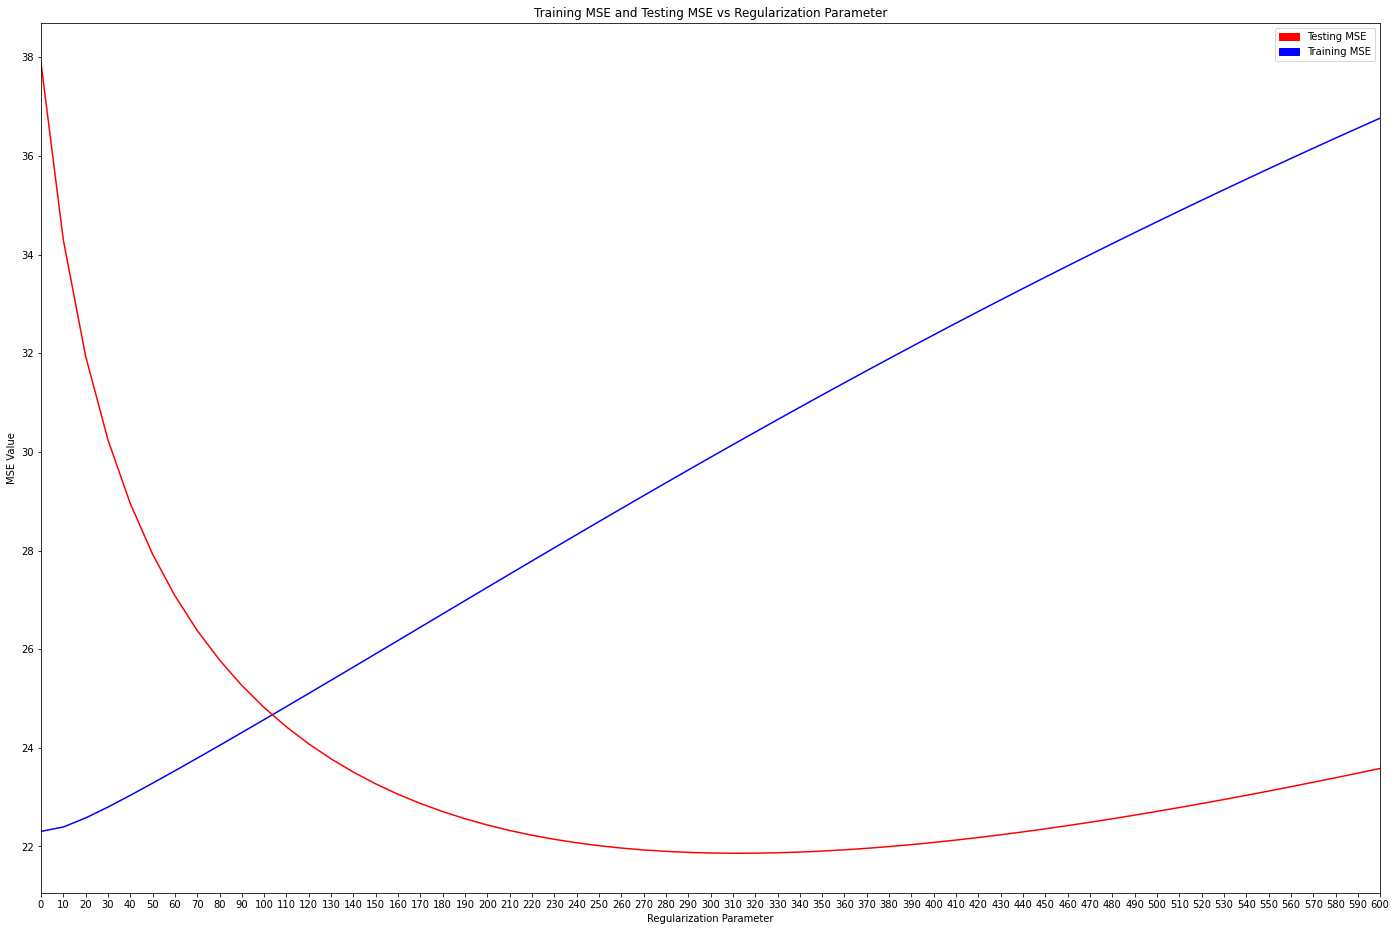

In [162]:
# RIDGE REGRESSION ON Z-SCORED DATA

# init I_n to scale by sqrt of regularizer in loop
identity_matrix = np.identity(num_features)

# create new target values by add 0's to match new y from ridge regression
training_y_ridge = np.vstack((training_y, np.zeros((num_features, 1))))
testing_y_ridge = np.vstack((testing_y, np.zeros((num_features, 1))))

# training y target values in ridge regression but centered for zscoring
training_y_centered_ridge = np.vstack((training_y_centered, np.zeros((num_features, 1))))

reg_values = np.linspace(0, 600, 61)
training_MSE_values = []
testing_MSE_values = []

for reg in reg_values:
  # form sqrt(regularizer) * I_n and stack it under X_training and X_testing (both zscored)
  reg_matrix = identity_matrix * np.sqrt(reg)
  training_ridge = np.vstack((training_zscore, reg_matrix))
  testing_ridge = np.vstack((testing_zscore, reg_matrix))

  # solve the ridge regression problem with the ridge zscored X and y
  w_ridge = solve_ls(training_ridge, training_y_centered_ridge)
  
  # calculate the MSE using the ridge regression matrices and add to array
  MSE_training_ridge = MSE_z(w_ridge, training_zscore, training_y, y_training_mean)
  training_MSE_values.append(MSE_training_ridge)

  MSE_testing_ridge = MSE_z(w_ridge, testing_zscore, testing_y, y_training_mean)
  testing_MSE_values.append(MSE_testing_ridge)

# plot Training MSE and Testing MSE vs Regularization Parameter
# red is testing, blue is training
plt.title("Training MSE and Testing MSE vs Regularization Parameter") 
plt.xlabel("Regularization Parameter") 
plt.ylabel("MSE Value") 
plt.rcParams["figure.figsize"] = (24,16)
plt.xticks(np.linspace(0, 600, 61))
plt.xlim(0, 600)
plt.plot(reg_values, training_MSE_values, color='blue')
plt.plot(reg_values, testing_MSE_values, color='red')
pop_a = mpatches.Patch(color='red', label='Testing MSE')
pop_b = mpatches.Patch(color='blue', label='Training MSE')
plt.legend(handles=[pop_a,pop_b])

plt.show()


**5-b) Validation Data and Hyperparameter Selection**    
To select a value for $\lambda$ (a hyperparamter) we can partition the training set (400 examples) into a smaller training set (300 examples) and a validation set (100 examples), leaving the testing set (106 examples) alone.    
* Execute the partition of the existing training data (before z-scoring)
* Repeat the computations in part 4-b using the new training data. This time compute MSE performance on the training set, the validation set, and the testing set. 
* Plot the curves of training MSE, validation MSE and testing MSE versus $\lambda.$
* Plot the testing MSE for Least Squares and Affine Least Squares on the same plot as horizontal lines.
* Since the validation data is training data you can use the results for validation performace to select a value for $\lambda.$
* What is a good choice for $\lambda$ based on the validation MSE?

300 seems to be a good choice based on validation MSE

* Using this value for $\lambda$ what is the expected testing performance? Is this performance better that the least squares (linear and affine) results in 3-a and 3-b?

The testing MSE is around 18-19, which is better than results in 3a and 3b.


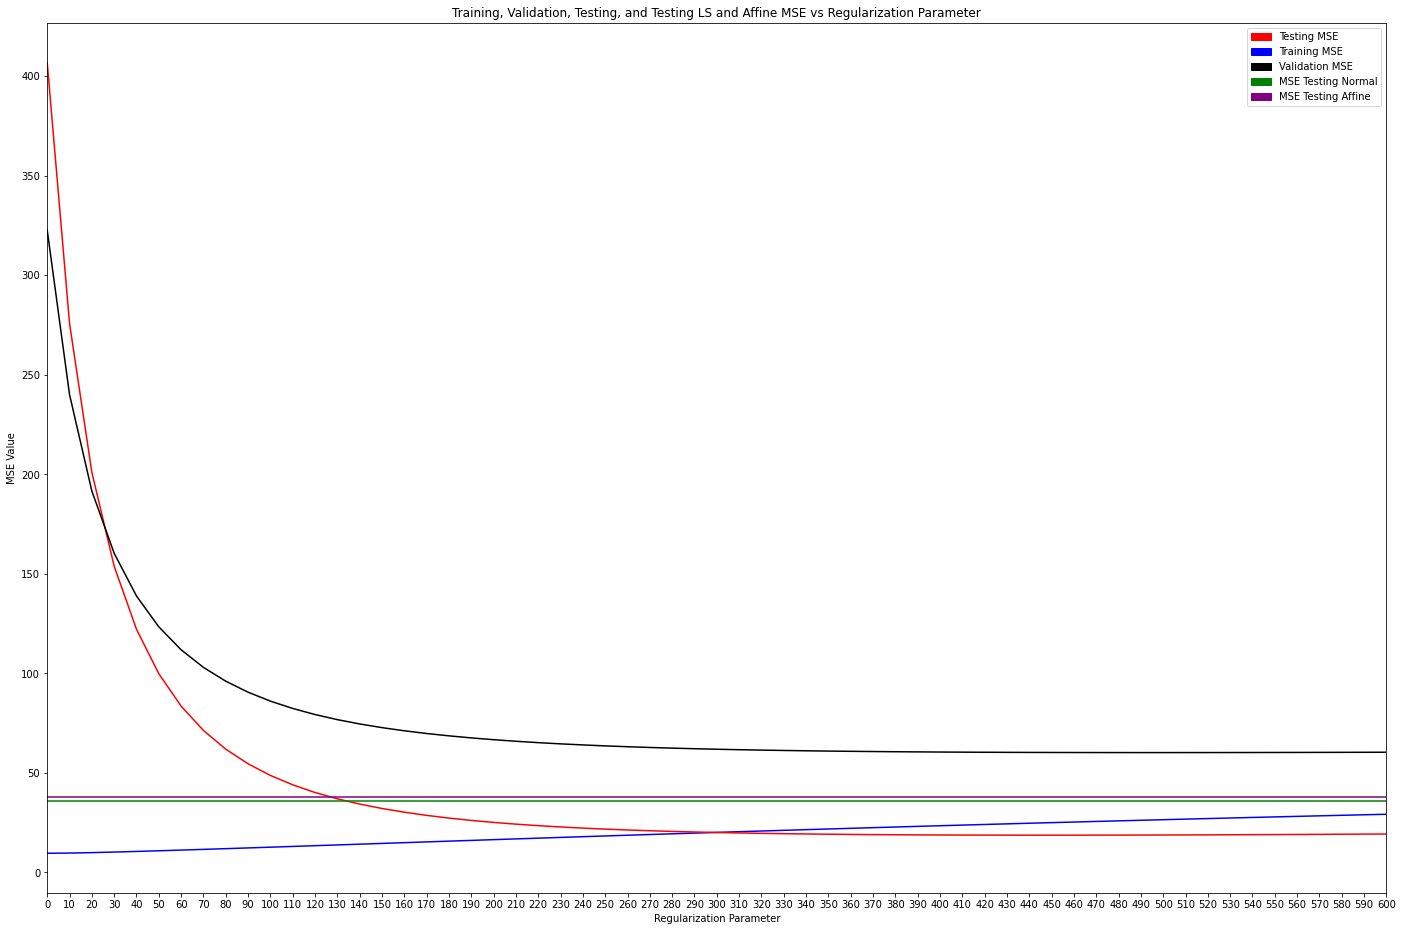

In [163]:
# RIDGE REGRESSION WITH VALIDATION DATA
# partition training set into training and validation
training_X_new = X[:300]
training_y_new = y[:300]
validation_X = X[300:400]
validation_y = y[300:400]
testing_X_new = X[400:]
testing_y_new = y[400:]

# Z-SCORING USING THE TRAINING DATA
# get the mean and std of training
training_mu_new, training_std_new = get_zscore_data(training_X_new)

# zscore training, validation, and testing data
training_zscore_new = zscore(training_X_new, training_mu_new, training_std_new)
validation_zscore = zscore(validation_X, training_mu_new, training_std_new)
testing_zscore_new = zscore(testing_X_new, training_mu_new, training_std_new)

# find the mean of training target values and center it
y_training_mean_new = np.mean(training_y_new)
training_y_centered_new = training_y_new - y_training_mean_new

# create new target values by add 0's to match new y from ridge regression
training_y_ridge_new = np.vstack((training_y_new, np.zeros((num_features, 1))))
validation_y_ridge = np.vstack((validation_y, np.zeros((num_features, 1))))
testing_y_ridge_new = np.vstack((testing_y_new, np.zeros((num_features, 1))))

# training y target values in ridge regression but centered for zscoring
training_y_centered_ridge_new = np.vstack((training_y_centered_new, np.zeros((num_features, 1))))

identity_matrix_new = np.identity(num_features)

reg_values_new = np.linspace(0, 600, 61)
training_MSE_values_new = []
validation_MSE_values = []
testing_MSE_values_new = []

for reg_new in reg_values_new:
  # form sqrt(regularizer) * I_n and stack it under X_training and X_testing (both zscored)
  reg_matrix_new = identity_matrix_new * np.sqrt(reg_new)
  training_ridge_new = np.vstack((training_zscore_new, reg_matrix_new))
  validation_ridge = np.vstack((validation_zscore, reg_matrix_new))
  testing_ridge_new = np.vstack((testing_zscore_new, reg_matrix_new))

  # solve the ridge regression problem with the ridge zscored X and y
  w_ridge_new = solve_ls(training_ridge_new, training_y_centered_ridge_new)
  
  # calculate the MSE using the ridge regression matrices and add to array
  MSE_training_ridge_new = MSE_z(w_ridge_new, training_zscore_new, training_y_new, y_training_mean_new)
  training_MSE_values_new.append(MSE_training_ridge_new)

  MSE_validation_ridge = MSE_z(w_ridge_new, validation_zscore, validation_y, y_training_mean_new)
  validation_MSE_values.append(MSE_validation_ridge)

  MSE_testing_ridge_new = MSE_z(w_ridge_new, testing_zscore_new, testing_y_new, y_training_mean_new)
  testing_MSE_values_new.append(MSE_testing_ridge_new)

# plot Training MSE, Validation MSE, and Testing MSE vs Regularization Parameter
# red is testing, blue is training, black is validation
plt.title("Training, Validation, Testing, and Testing LS and Affine MSE vs Regularization Parameter") 
plt.xlabel("Regularization Parameter") 
plt.ylabel("MSE Value") 
plt.rcParams["figure.figsize"] = (24,16)
plt.xticks(np.linspace(0, 600, 61))
plt.xlim(0, 600)
plt.plot(reg_values_new, training_MSE_values_new, color='blue')
plt.plot(reg_values_new, testing_MSE_values_new, color='red')
plt.plot(reg_values_new, validation_MSE_values, color='black')

# also plot old MSE values for normal LS and affine LS
plt.plot(reg_values, [MSE_testing] * 61, color='green')
plt.plot(reg_values, [MSE_testing_aff] * 61, color='purple')

pop_a = mpatches.Patch(color='red', label='Testing MSE')
pop_b = mpatches.Patch(color='blue', label='Training MSE')
pop_c = mpatches.Patch(color='black', label='Validation MSE')
pop_d = mpatches.Patch(color='green', label='MSE Testing Normal')
pop_e = mpatches.Patch(color='purple', label='MSE Testing Affine')
plt.legend(handles=[pop_a,pop_b, pop_c, pop_d, pop_e])

plt.show()